# Redes Neuronales para Clasificar y Predecir Clientes

### En este proyecto, desarrollaremos un algortimo de Machine Learning, donde nos vamos a valer de una Red Neuronal(Multicapa) de Clasificación. En este código y notebook, desarrollaremos un modelo de red neuronal para un negocio, este modelo clasifica a los clientes, para ayudar al negocio saber en quienes enfocar su marketing, y en cuáles dejar en segundo plano.



##### Primero, queda integrar nuestras herramientas de trabajo y desarrollo

### Primer Paso: Herramientas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [1]:
#Luego nos queda importar nuestro dataset

### Segundo Paso: Importar DataSet

In [124]:
clientes= pd.read_csv("C:\\Users\\USUARIO\\OneDrive\\Documentos\\ciencia de datos\\proyectos de ciencia de datos\\MLredneuronal\\Clientesweb\\data\\Clientes-RedesN.csv")
clientes

,edad,ingresos,gasto,clase
0,56,58467,73267,0
1,46,43328,49136,0
2,32,111412,24625,1
3,60,155059,83873,1
4,25,78871,73592,1
...,...,...,...,...
295,52,94460,74686,0
296,33,122634,68661,0
297,58,109930,45247,0
298,53,26801,17748,1


### Tercer Paso: Análisis del Modelo

In [6]:
# Tomamos a los 0 como negativo(o no) y a los 1 como sí

In [125]:
#Un pequeño análisis de las estadísticas detrás de este data set, a modo de datos extras para tener en cuenta
print("\nEstadísticas descriptivas:")
clientes.describe()


Estadísticas descriptivas:


,edad,ingresos,gasto,clase
count,300.000000,300.000000,300.000000,300.000000
mean,40.810000,110085.573333,47114.410000,0.403333
std,13.547164,51729.659631,27600.933596,0.491386
min,18.000000,21062.000000,1055.000000,0.000000
25%,29.000000,64714.500000,24256.000000,0.000000
50%,41.500000,112833.000000,44729.500000,0.000000
75%,52.000000,151905.500000,70897.000000,1.000000
max,64.000000,199819.000000,99142.000000,1.000000


In [7]:
#Luego, realizamos un pequeño gráfico para comprender mejor como es el impacto de estos clientes, como se distribuyen

In [127]:
buenos = clientes[clientes["clase"]==1]
malos = clientes[clientes["clase"]==0]

In [128]:
buenos

,edad,ingresos,gasto,clase
2,32,111412,24625,1
3,60,155059,83873,1
4,25,78871,73592,1
6,56,148391,45261,1
10,28,64064,51343,1
...,...,...,...,...
289,42,108461,88731,1
290,46,146174,1302,1
293,35,174786,9717,1
298,53,26801,17748,1


#### Dependiendo su edad e ingresos

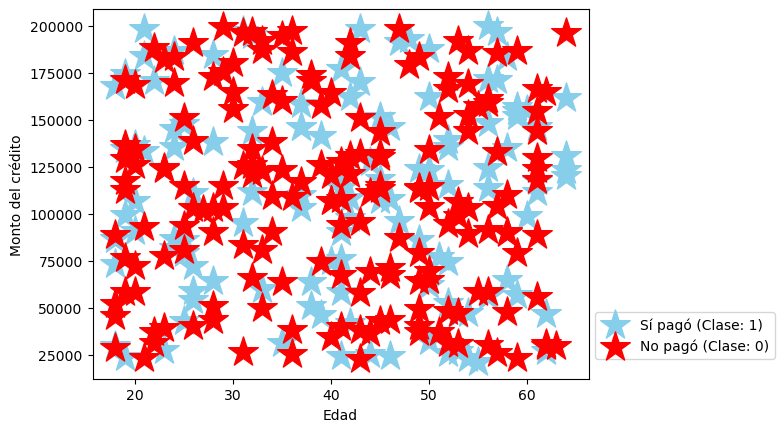

In [129]:
plt.scatter(buenos["edad"], buenos["ingresos"],
            marker="*", s=500, color="skyblue", label="Sí pagó (Clase: 1)")
plt.scatter(malos["edad"], malos["ingresos"],
            marker="*", s=500, color="red", label="No pagó (Clase: 0)")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")

plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

#### Dependiendo su Edad y Gasto

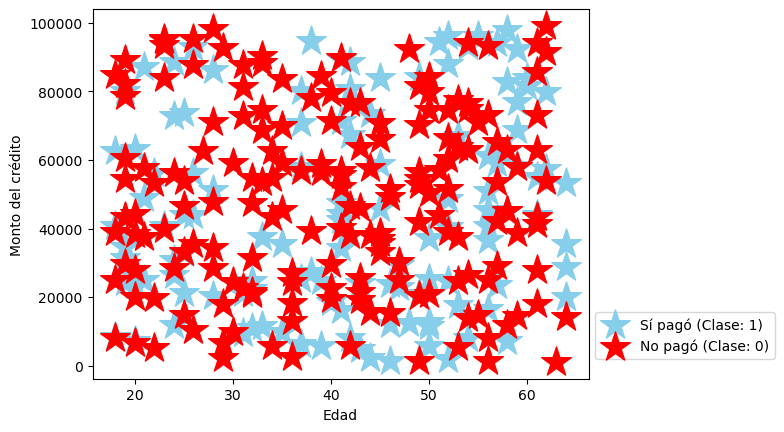

In [130]:
plt.scatter(buenos["edad"], buenos["gasto"],
            marker="*", s=500, color="skyblue", label="Sí pagó (Clase: 1)")
plt.scatter(malos["edad"], malos["gasto"],
            marker="*", s=500, color="red", label="No pagó (Clase: 0)")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")

plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

##### Dependiendo su Monto de ingresos y sus Gastos

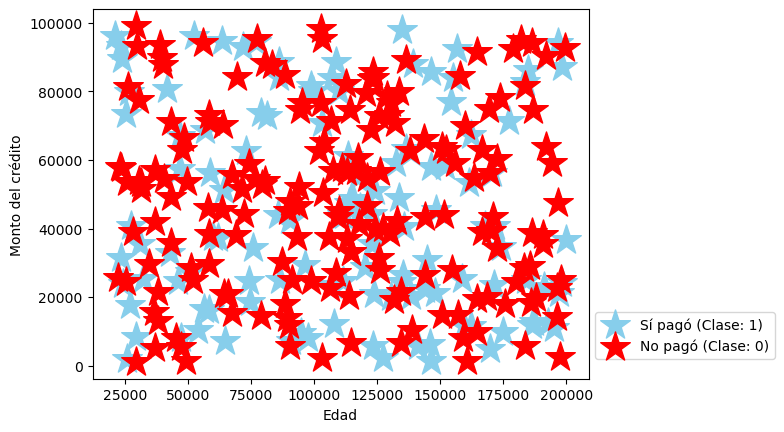

In [131]:
plt.scatter(buenos["ingresos"], buenos["gasto"],
            marker="*", s=500, color="skyblue", label="Sí pagó (Clase: 1)")
plt.scatter(malos["ingresos"], malos["gasto"],
            marker="*", s=500, color="red", label="No pagó (Clase: 0)")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")

plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

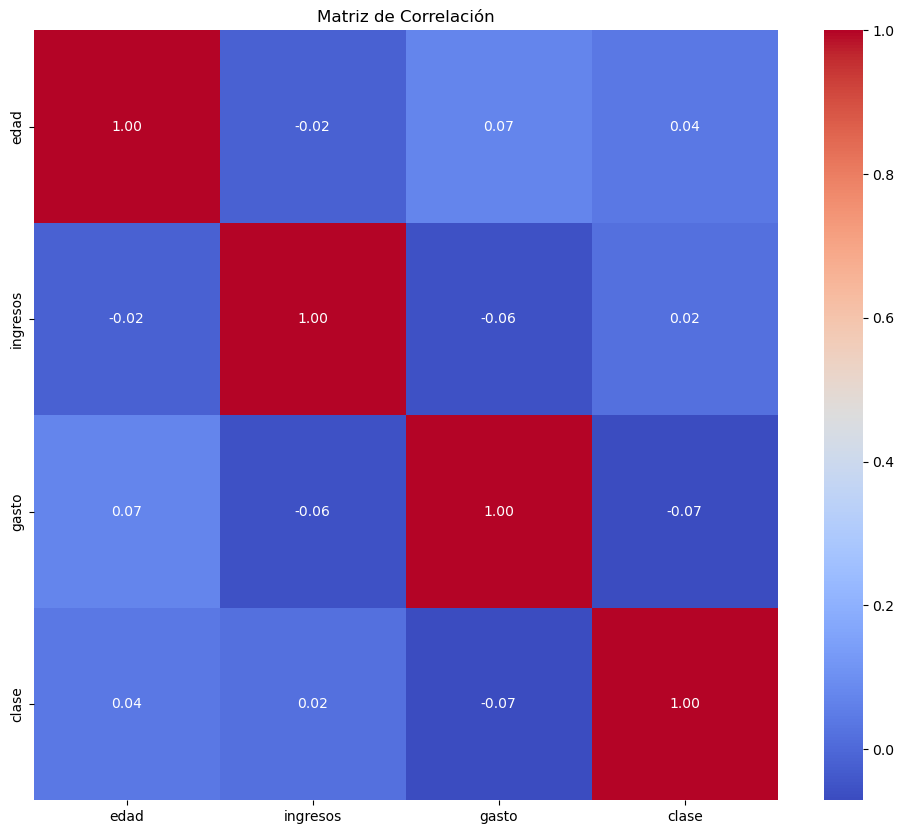

In [132]:
# Matriz de correlación:
plt.figure(figsize=(12, 10))
correlation_matrix = clientes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

In [112]:
#Podemos ver que la mayor relación que hay es entre la Edad y el Gasto que genera

### Cuarto Paso: Preparación del Modelo

#### Se puede observar donde se concentran cada clase de clientes

In [133]:
X = clientes[["edad", "ingresos", "gasto"]]
y = clientes["clase"]

scaler = MinMaxScaler()#Escalamos los datos para que se puedan procesar de manera mas sencilla(solo los datos de la variable X) al ser una clasificación bianria
X_scaled = scaler.fit_transform(X)
#Entrenamiento de los datos escalados
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


#### 4.1: Creación del Modelo

In [134]:
model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation="relu"))#capa oculta: entrenamiento, tenemos 16 neuronas, para que el entrenamiento no sea ni sobre entrenado ni bajoentrenado
model.add(Dense(8, activation="relu"))#capa oculta: de embudo de neuronas y la concentración en cuanto a los datos
model.add(Dense(1, activation="sigmoid"))#capa de salida

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

C:\Users\USUARIO\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [136]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),
                    epochs=50, batch_size=8, verbose=0)

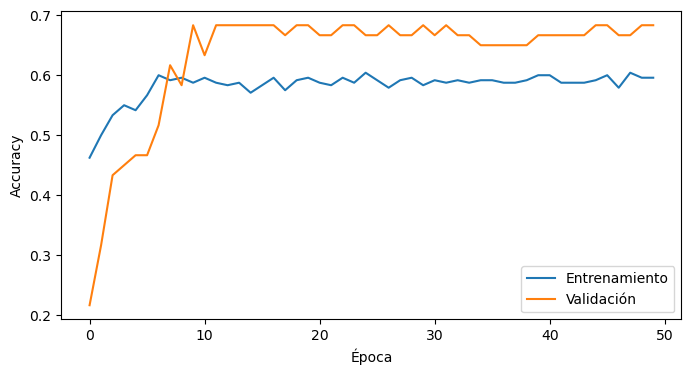

In [137]:
#Visualicemos al modelo, su exactitud en las epocas, dependiendo del entrenamiento a la par de su validación, y podremos ver que no tenemos ni overfitting ni underfitting
plt.figure(figsize=(8,4))
plt.plot(history.history["accuracy"], label="Entrenamiento")
plt.plot(history.history["val_accuracy"], label="Validación")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Quinto Paso: Evaluación del modelo

In [138]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Exactitud en test: {acc:.2%}")

y_pred = (model.predict(X_test) > 0.6).astype("int32")
print(classification_report(y_test, y_pred))

Exactitud en test: 68.33%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
              precision    recall  f1-score   support

           0       0.75      0.93      0.83        46
           1       0.00      0.00      0.00        14

    accuracy                           0.72        60
   macro avg       0.38      0.47      0.42        60
weighted avg       0.58      0.72      0.64        60



##### Esto que quiere decir: que la exactitud es del 75%, la precisión(precisión de predicción) para predecir a los de valor 0 es del 78%, pero a los del valor 1 es del 40%, el recall(precisión en identificar cada clase), es: para el valor 0 de 93 y de la clase 1 del 14. 

#### Para entenderlo mejor veamos una matriz de confusión, muestra que tan inexacto o exacto es el modelo

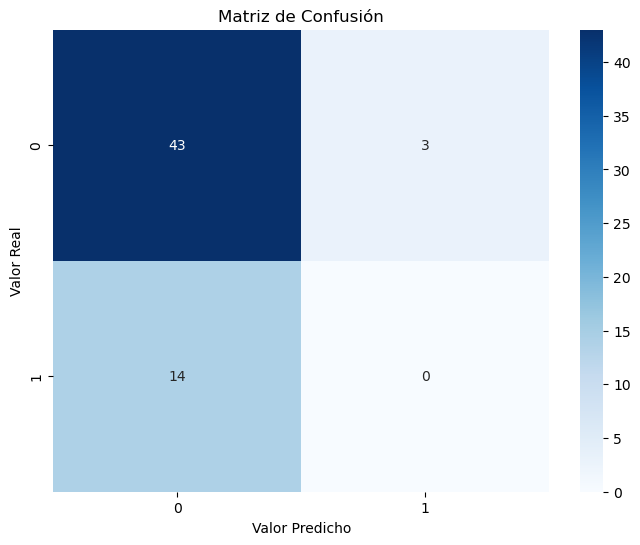

In [139]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

##### Sin hablar en términos técnicos, se puede ver que de los valores reales de 0, fueron 40 los clasificados como 0, osea Verdadero Negativo, y de la clase 1, clasificó a 12 como 0, eso sería como Falso Negativo. 

#### Esto nos muestra que el modelo tiene sesgo hacia la clase O, peligroso porque puede hacernos perder valisoso clientes, ¿Que podemos hacer? corregir el modelo, ya sea balanceando al data set, o aumentando las neuronas por capa para su entrenamiento y así que detecté mas de clase 1 como clase 1, vayamos por el primero: balanceando el data set.

### Sexto Paso: Corrigiendo Modelo

In [140]:
# Vamos a valernos de datos sintéticos para equilibarlo:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_scaled, y)

In [141]:
# Repitamos todo el proceso:
history = model.fit(X_res, y_res, validation_data=(X_test,y_test),
                    epochs=50, batch_size=8, verbose=0)

In [142]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Exactitud en test: {acc:.2%}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

Exactitud en test: 58.33%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

           0       0.82      0.59      0.68        46
           1       0.30      0.57      0.39        14

    accuracy                           0.58        60
   macro avg       0.56      0.58      0.54        60
weighted avg       0.70      0.58      0.62        60



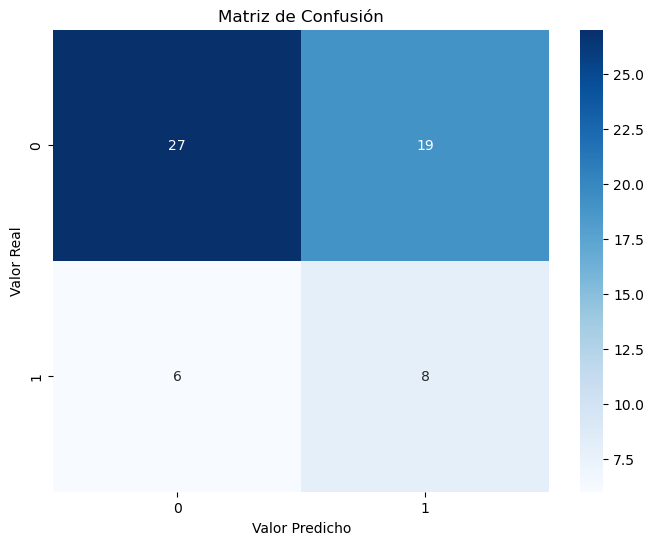

In [143]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Valor Real')
plt.xlabel('Valor Predicho')
plt.show()

### Un gran progreso en la exactitud de la predicción, vayamos al siguiente paso

### Octavo Paso: Intentemos con otro Cliente

In [151]:
nuevo_cliente = scaler.transform([[35, 50000, 20000]])
prob = model.predict(nuevo_cliente)[0][0]
print("Probabilidad de ser cliente con Potencial para la Empresa:", f"{prob:.2%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Probabilidad de ser cliente con Potencial para la Empresa: 100.00%


### Hemos podido entender un data set, y pudimos entrenar un modelo, atender su sesgo con distintos métodos, y hacer la prueba con otros clientes, esta esa una herramienta para poder catalogar, o mejor dicho clasificar, a los clientes para saber que tan fiables son, siga al tanto de este proyecto, porque vamos a desarrollar una app web con este modelo de redes neuronales